In [56]:
import numpy as np
import pandas as pd
%matplotlib inline

In [61]:
df = pd.read_csv('AirPassengers.csv', index_col="Month", parse_dates=True)

In [62]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [63]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [64]:
df.dropna()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
################################################################################################################################

# Simple Exponential Smoothing

In [86]:
df.describe()

# count mean 70

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [87]:
train_data = df.iloc[:70]

In [88]:
train_data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1954-06-01,264
1954-07-01,302
1954-08-01,293


In [90]:
test_data = df.iloc[70:]

In [91]:
test_data

,#Passengers
Month,
1954-11-01,203
1954-12-01,229
1955-01-01,242
1955-02-01,233
1955-03-01,267
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


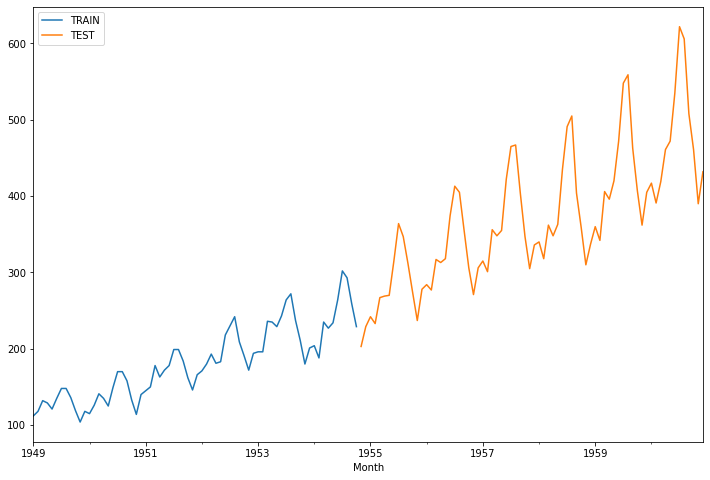

In [92]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

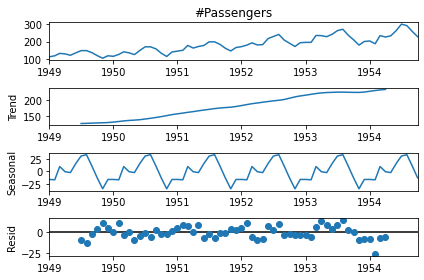

In [95]:
seasonal_decompose(train_data['#Passengers']).plot();

In [96]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [97]:
# span = 12 # The model will consider the last 12 months weighted average for forecasting
# alpha = 2/(span+1)
# model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
# test_predictions = model.forecast(36).rename('SES Forecast')

In [98]:
span = 12 
alpha = 2/(span+1)

In [99]:
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)

C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [100]:
test_predictions = model.forecast(36).rename('SES Forecast')

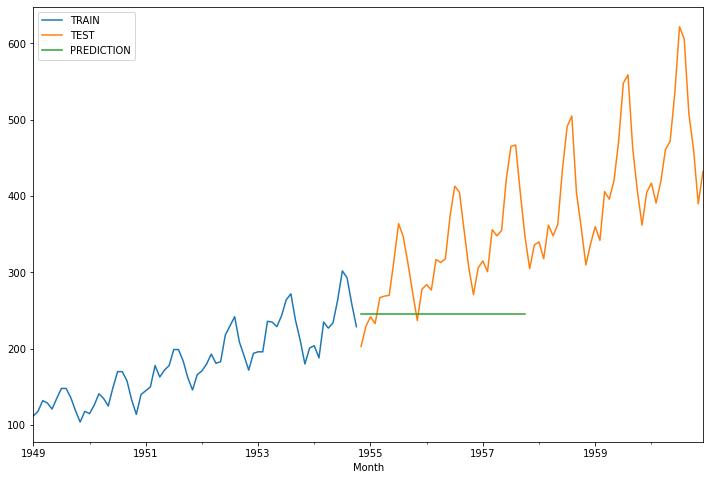

In [101]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
################################################################################################################################

In [71]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://i.ibb.co/Y77bsC2/1234.png", width=500, height=500)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [72]:
df.index.freq = "MS"

In [73]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [74]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [18]:
span =12
alpha = 2/(span+1)

In [19]:
df['EWMA12'] = df['#Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [20]:
df.head()

,#Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [21]:
model = SimpleExpSmoothing(df['#Passengers'])

In [22]:
model.fit(smoothing_level=alpha, optimized=False)

In [23]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [24]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [25]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [26]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [27]:
df.head()

,#Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [28]:
# df['SES12'] = SimpleexpSmoothing(df['#Passengers'].fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1))

# ---------------------------------------------------------------------------------------- 

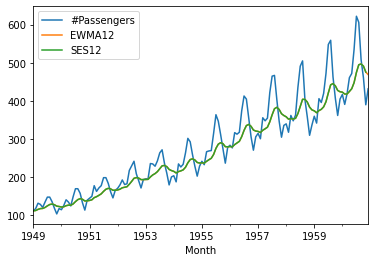

In [30]:
df.plot()

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
df['DES_add_12'] = ExponentialSmoothing(df['#Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [45]:
df['DES_mul_12'] = ExponentialSmoothing(df['#Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [46]:
df.head()

,#Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,112.049247,112.049247
1949-02-01,118,112.923077,112.923077,118.051885,118.051885
1949-03-01,132,115.857988,115.857988,132.058041,132.058041
1949-04-01,129,117.879836,117.879836,129.056722,129.056722
1949-05-01,121,118.359861,118.359861,121.053204,121.053204


In [47]:
df.columns

Index(['#Passengers', 'EWMA12', 'SES12', 'DES_add_12', 'DES_mul_12'], dtype='object')

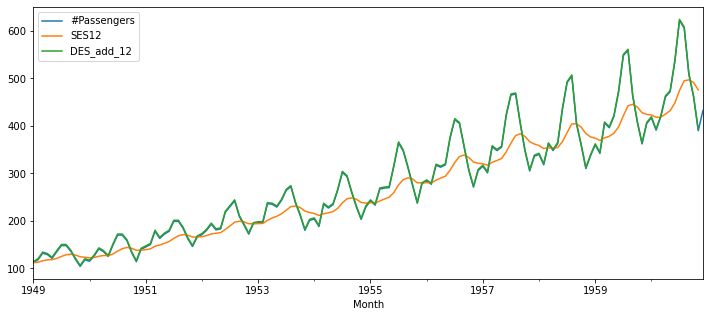

In [38]:
df[['#Passengers','SES12','DES_add_12']].plot(figsize=(12,5))

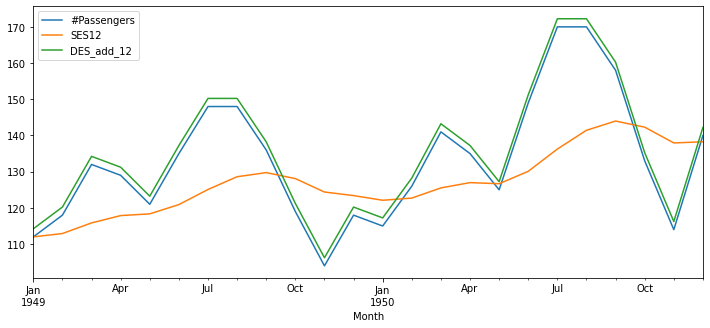

In [40]:
df[['#Passengers','SES12','DES_add_12']].iloc[:24].plot(figsize=(12,5))

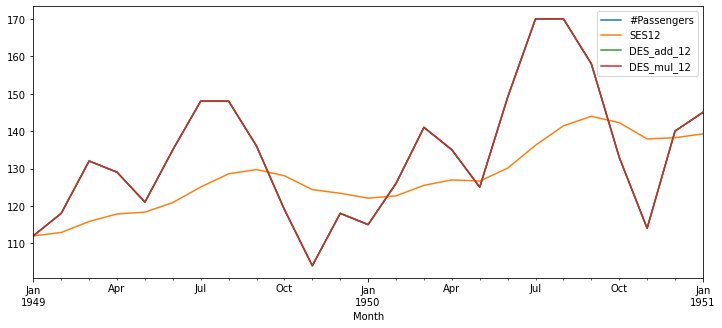

In [50]:
df[['#Passengers','SES12','DES_add_12','DES_mul_12']].iloc[:25].plot(figsize=(12,5))